In [2]:
import pandas as pd
import gc
import torch
from tqdm import tqdm
df = pd.read_csv("../data/Collected_langs.csv")

In [3]:
hr_languages = df[(df.N_tokens >= 350000)].Name.tolist()
lr_languages = df[(df.N_tokens > 10000) & (df.N_tokens < 350000)].Name.tolist()

# Big TL results

In [7]:
import glob
import os
import json
from pathlib import Path
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [8]:
tl_res_path = "/home/jovyan/protasov/Transfer_learning/mt5_experiments/"

In [9]:
all_paths = glob.glob(f"{tl_res_path}/training_on_*")
all_logs = glob.glob(f"{tl_res_path}/training_on_*/**/new_log.json", recursive=True)

In [10]:
data_for_df = {"hr_lang": [], "lr_lang": [], "min_perplexity": []}
for file_log in all_logs:
    f = open(file_log)
    data = json.load(f)
    
    test_results = data["test"]
    hr_lang_name = Path(file_log).parent.parent.name.split("_")[-1]
    
    for lr_lang, test_results_perps in test_results.items():
        lr_lang_name = Path(lr_lang).name
        if lr_lang_name not in ["Armenian (Eastern)", "Armenian (Western)", "Indonesian", "Irish", "Tamil"]:
            try:
                min_perplexity = min(test_results_perps)

                data_for_df["hr_lang"].append(hr_lang_name)
                data_for_df["lr_lang"].append(lr_lang_name)
                data_for_df["min_perplexity"].append(min_perplexity)
            except:
                print(lr_lang, test_results_perps)

/home/jovyan/datasets/XL_Dataset/Bhojpuri []
/home/jovyan/datasets/XL_Dataset/Bhojpuri []
/home/jovyan/datasets/XL_Dataset/Bhojpuri []
/home/jovyan/datasets/XL_Dataset/Bhojpuri []
/home/jovyan/datasets/XL_Dataset/Bhojpuri []
/home/jovyan/datasets/XL_Dataset/Bhojpuri []
/home/jovyan/datasets/XL_Dataset/Bhojpuri []
/home/jovyan/datasets/XL_Dataset/Bhojpuri []
/home/jovyan/datasets/XL_Dataset/Bhojpuri []
/home/jovyan/datasets/XL_Dataset/Bhojpuri []
/home/jovyan/datasets/XL_Dataset/Bhojpuri []
/home/jovyan/datasets/XL_Dataset/Bhojpuri []
/home/jovyan/datasets/XL_Dataset/Bhojpuri []
/home/jovyan/datasets/XL_Dataset/Bhojpuri []
/home/jovyan/datasets/XL_Dataset/Bhojpuri []
/home/jovyan/datasets/XL_Dataset/Bhojpuri []
/home/jovyan/datasets/XL_Dataset/Bhojpuri []
/home/jovyan/datasets/XL_Dataset/Bhojpuri []
/home/jovyan/datasets/XL_Dataset/Bhojpuri []
/home/jovyan/datasets/XL_Dataset/Bhojpuri []
/home/jovyan/datasets/XL_Dataset/Bhojpuri []
/home/jovyan/datasets/XL_Dataset/Bhojpuri []
/home/jovy

In [11]:
def sort_dict(test_dict):
    return {k: v for k, v in sorted(test_dict.items(), key=lambda item: item[1])}

In [12]:
df = pd.DataFrame(data_for_df)
table = pd.pivot_table(df, index=['hr_lang'], columns = ["lr_lang"])

In [18]:
table.columns = table.columns.droplevel()

In [23]:
table[["Nadroga"]].sort_values("Nadroga")

lr_lang,Nadroga
hr_lang,
Afrikaans,32.389679
Lithuanian,36.771954
Slovene,37.234879
Lingala,41.175281
French,45.796373
...,...
Danish,2744.261544
Awadhi,2759.246748
Papiamentu,2835.203894


In [28]:
table.to_csv("tl_results_june.csv")

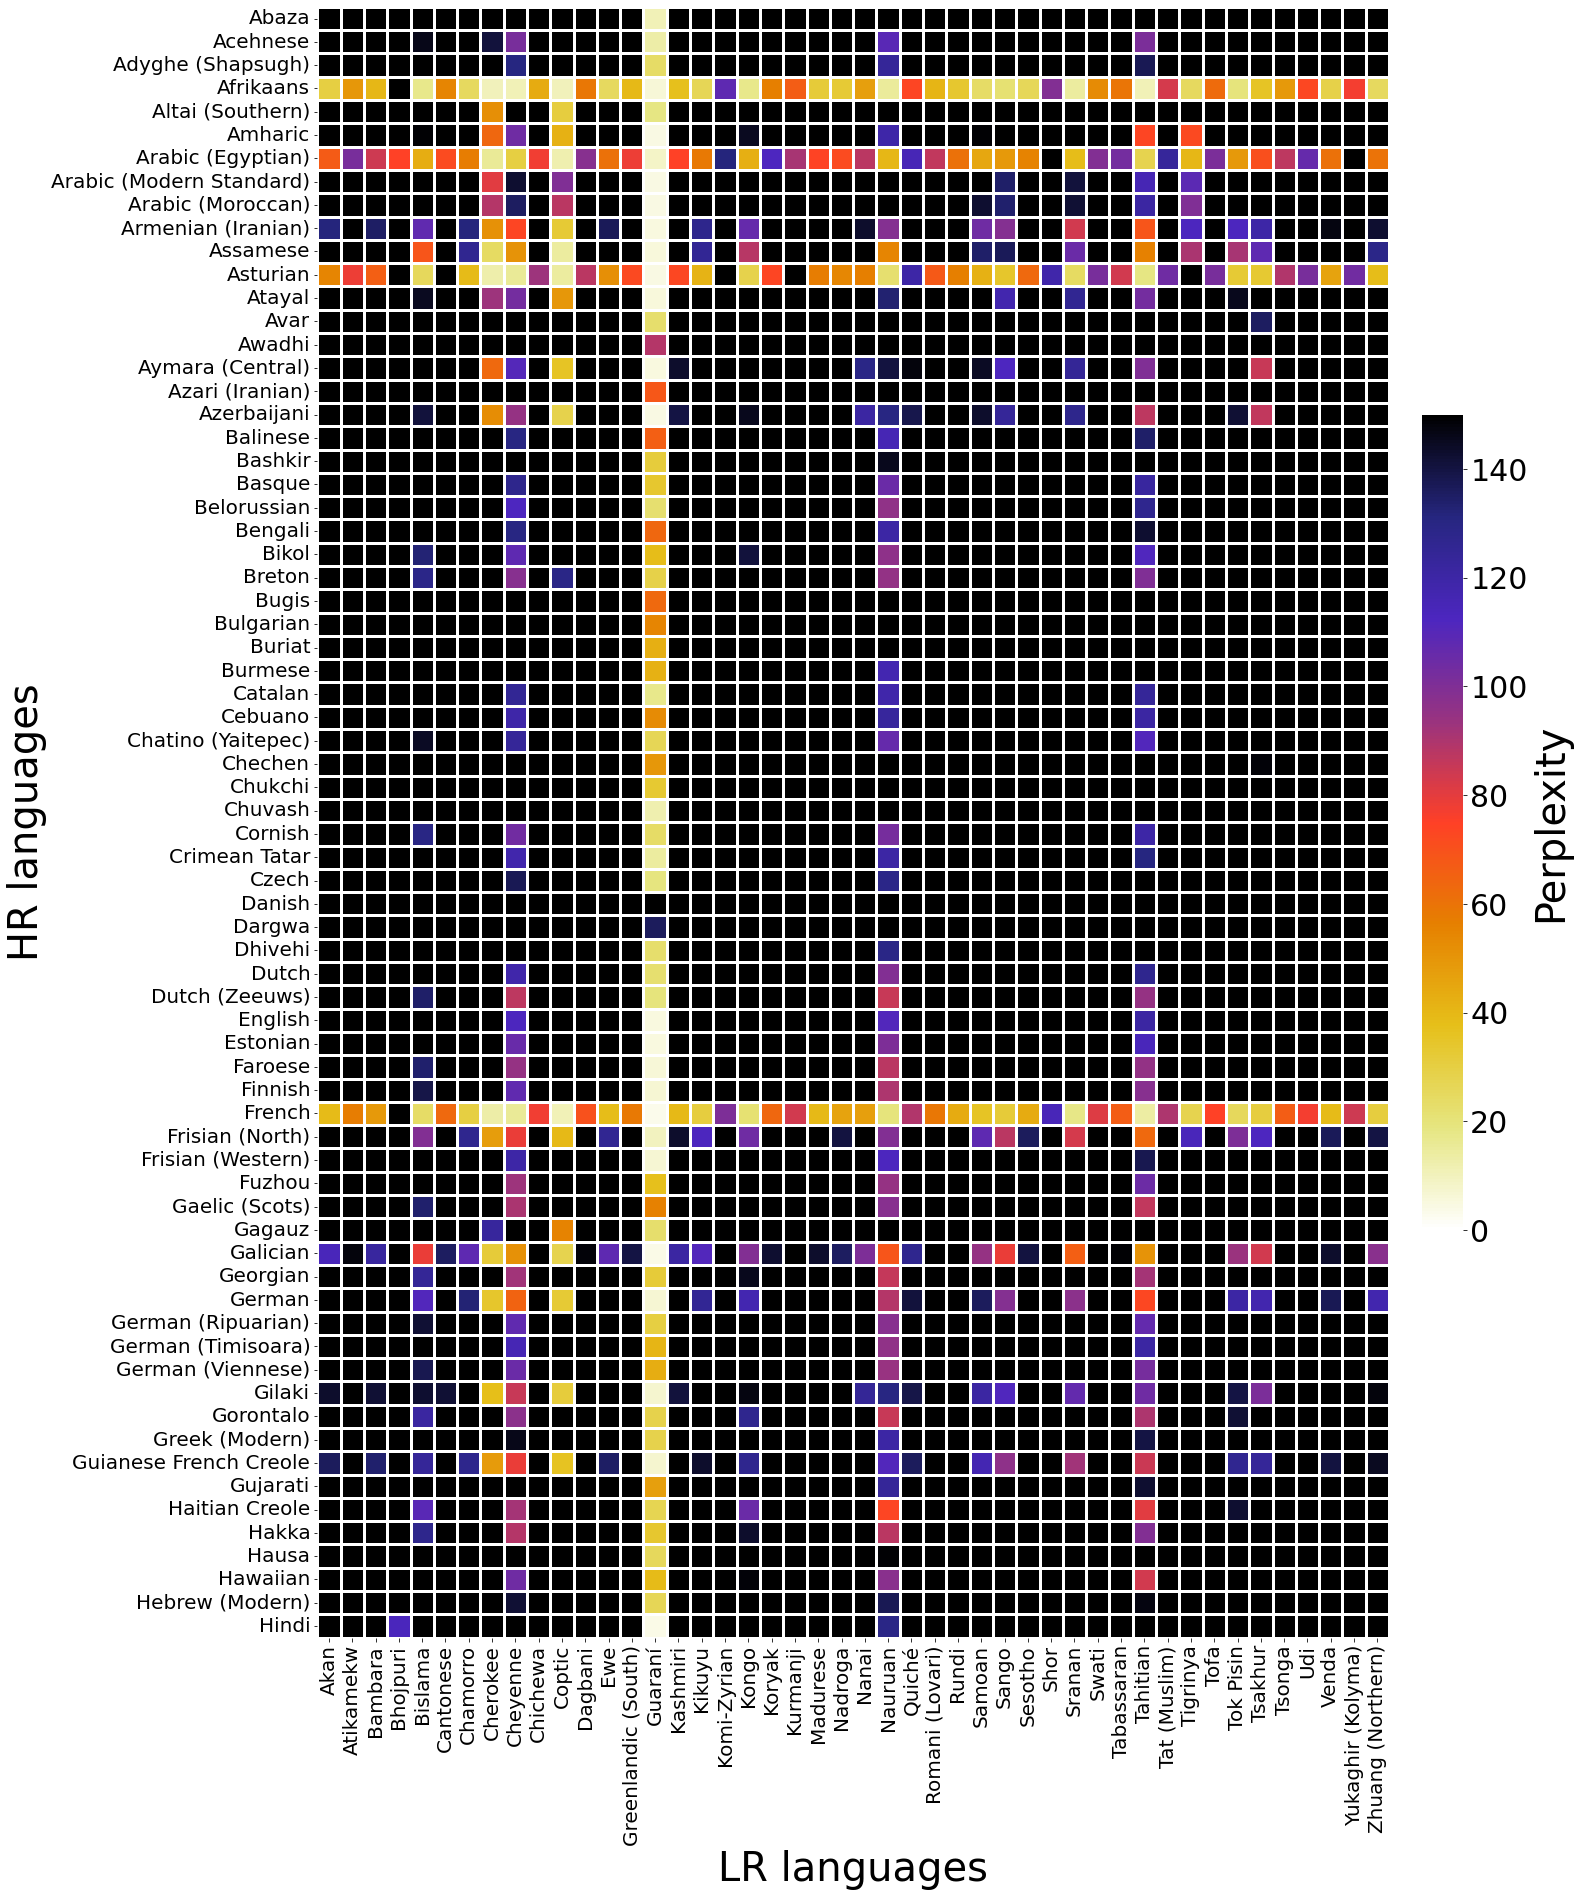

In [393]:
fig, ax = plt.subplots(1,1, figsize=(120,30))

tab_n_df = table.fillna(150).iloc[:70, :]#.div(table.max(axis=0), axis=1)
sns.heatmap(tab_n_df, ax=ax, square=True, cbar=True, cmap="CMRmap_r", vmax=150, vmin=0, linewidths=1.01, 
            cbar_kws={'shrink': 0.5, 'label': 'Perplexity', "pad": 0.005})
ax.set_ylabel('HR languages', fontsize=40)
ax.set_xlabel('LR languages', fontsize=40)
ax.tick_params(axis='both', labelsize=20)
cbar = ax.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=30)
ax.figure.axes[-1].yaxis.label.set_size(40)

fig.savefig("heatmap1.pdf", bbox_inches="tight", dpi=500)

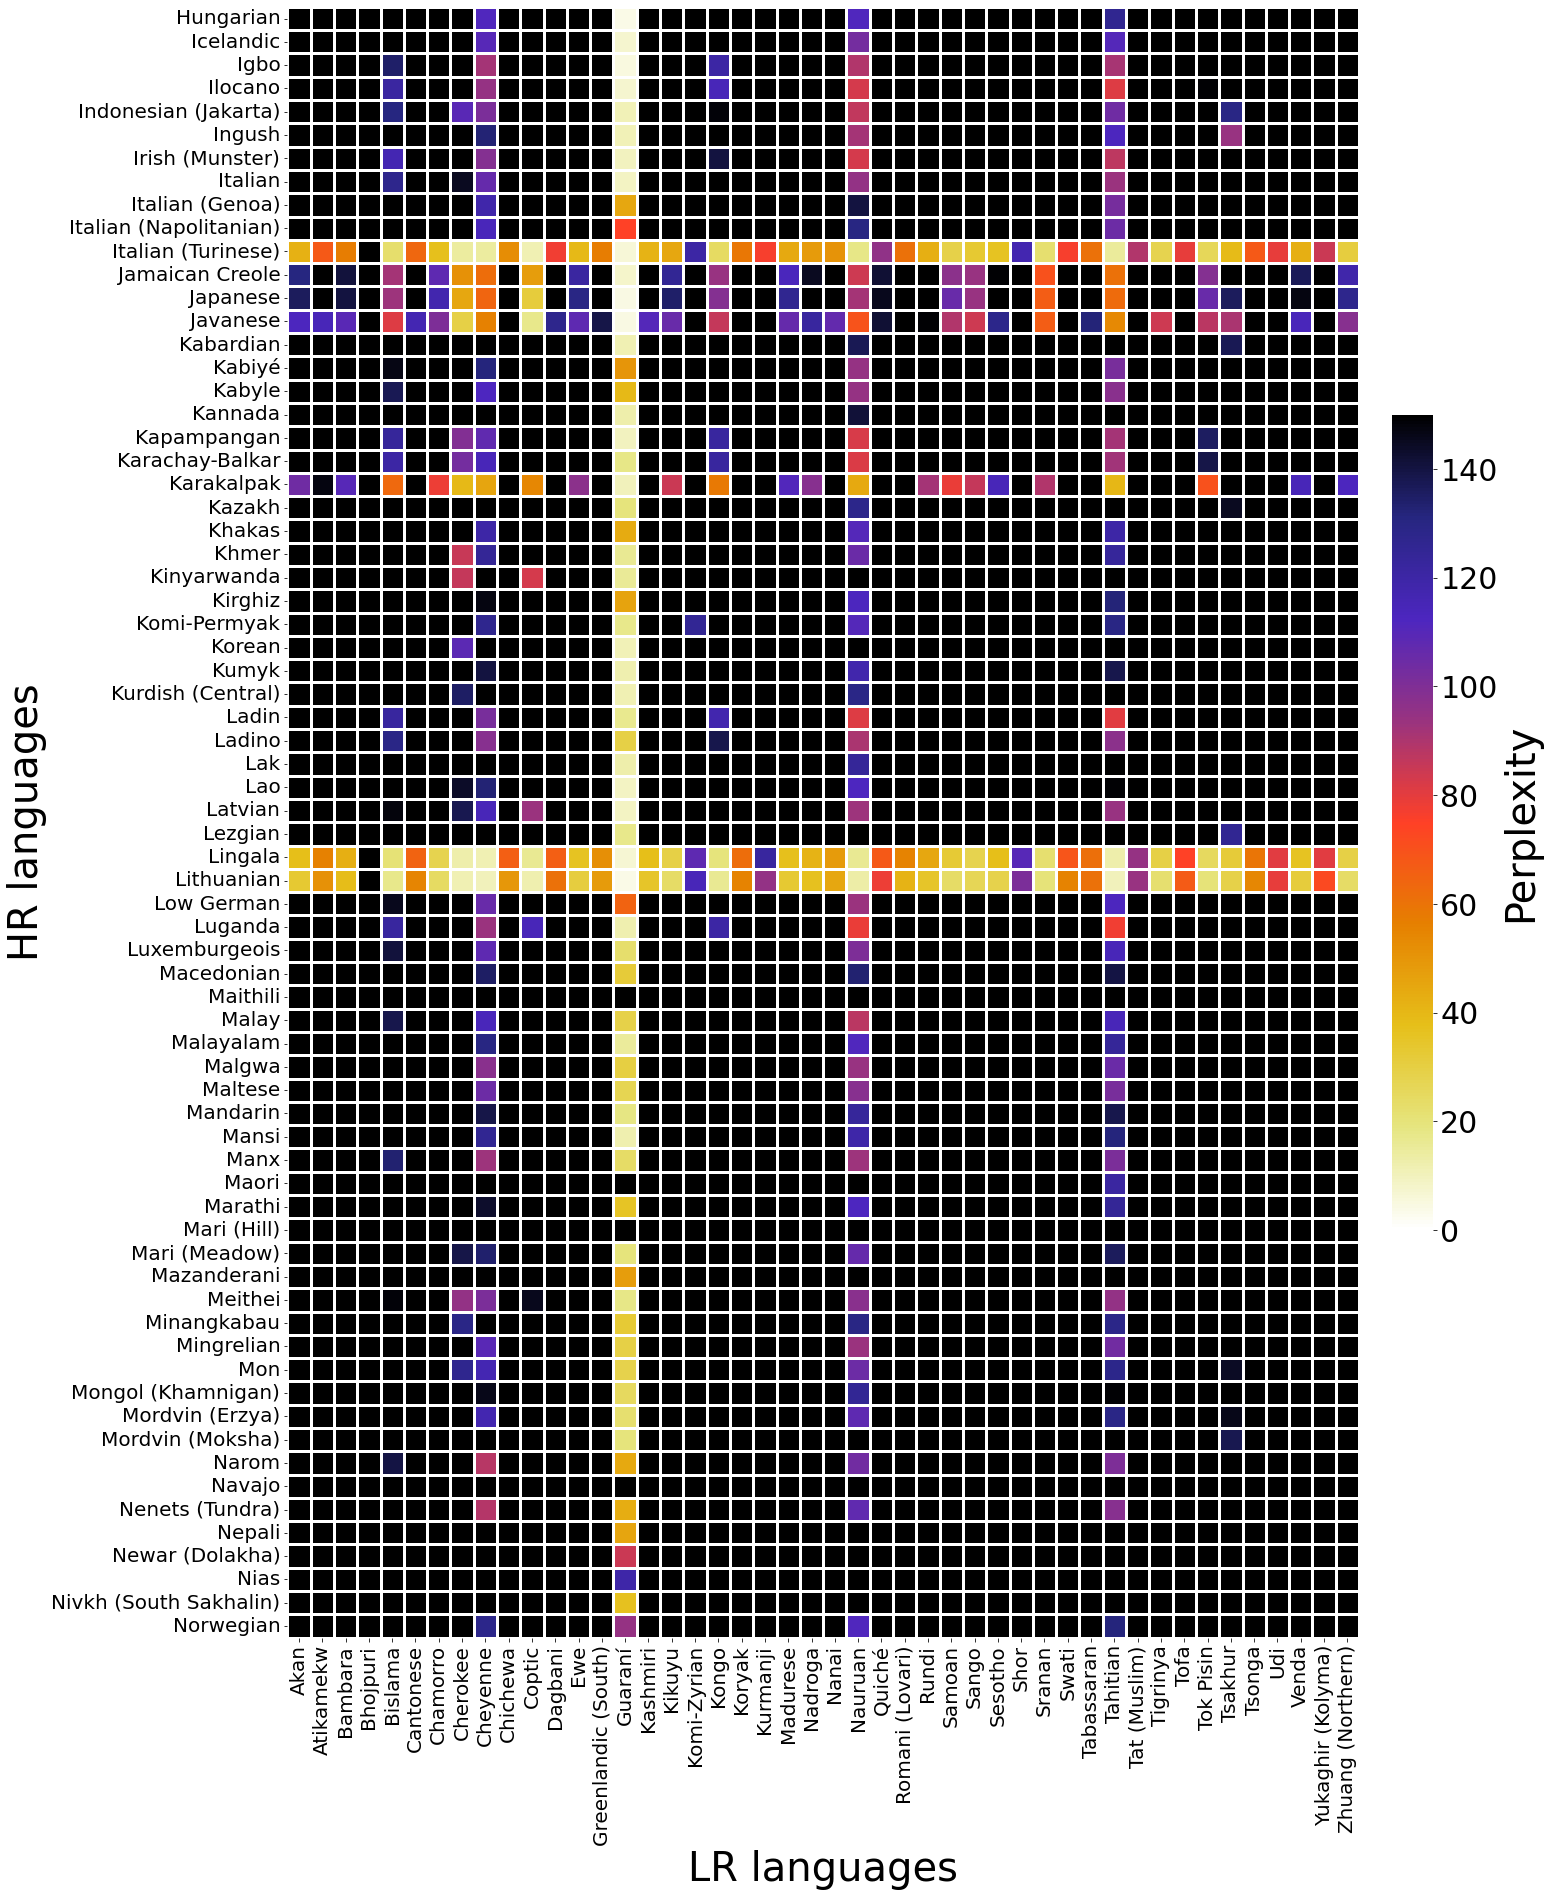

In [394]:
fig, ax = plt.subplots(1,1, figsize=(120,30))

tab_n_df = table.fillna(150).iloc[70:140, :]#.div(table.max(axis=0), axis=1)
sns.heatmap(tab_n_df, ax=ax, square=True, cbar=True, cmap="CMRmap_r", vmax=150, vmin=0, linewidths=1.01, 
            cbar_kws={'shrink': 0.5, 'label': 'Perplexity', "pad": 0.005})
ax.set_ylabel('HR languages', fontsize=40)
ax.set_xlabel('LR languages', fontsize=40)
ax.tick_params(axis='both', labelsize=20)
cbar = ax.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=30)
ax.figure.axes[-1].yaxis.label.set_size(40)

fig.savefig("heatmap2.pdf", bbox_inches="tight", dpi=500)

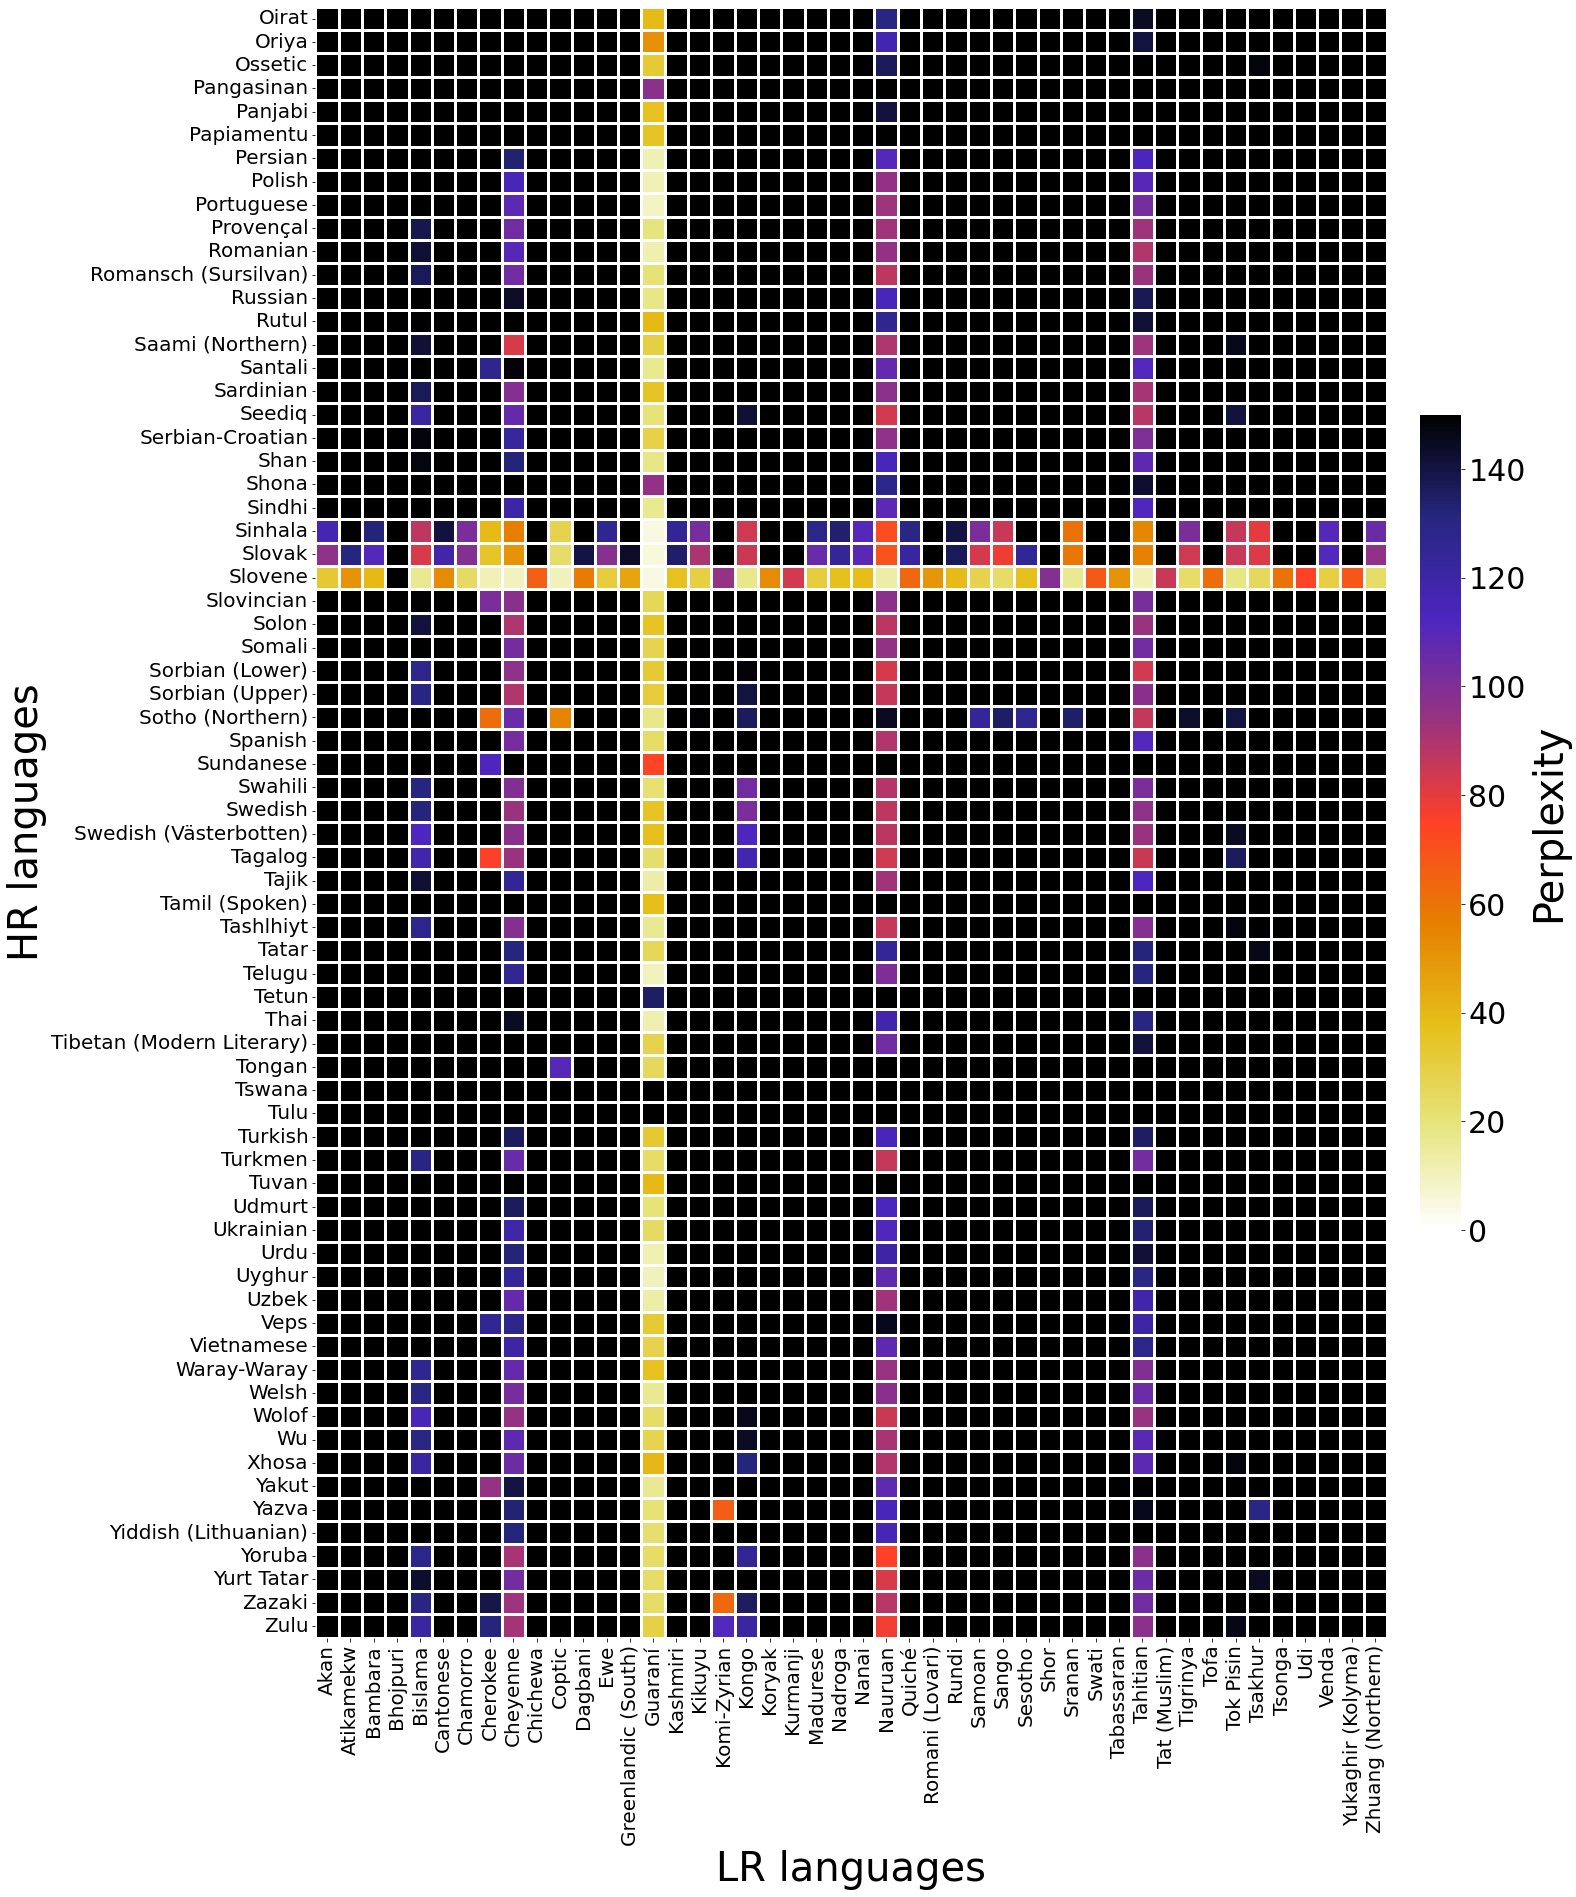

In [395]:
fig, ax = plt.subplots(1,1, figsize=(120,30))

tab_n_df = table.fillna(150).iloc[140:, :]#.div(table.max(axis=0), axis=1)
sns.heatmap(tab_n_df, ax=ax, square=True, cbar=True, cmap="CMRmap_r", vmax=150, vmin=0, linewidths=1.01, 
            cbar_kws={'shrink': 0.5, 'label': 'Perplexity', "pad": 0.005})
ax.set_ylabel('HR languages', fontsize=40)
ax.set_xlabel('LR languages', fontsize=40)
ax.tick_params(axis='both', labelsize=20)
cbar = ax.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=30)
ax.figure.axes[-1].yaxis.label.set_size(40)

fig.savefig("heatmap3.pdf", bbox_inches="tight", dpi=500)

In [13]:
sort_dict(table["Bhojpuri"].to_dict())

{'Arabic (Egyptian)': 74.85812632858735,
 'Gagauz': 329.3447719575884,
 'Acehnese': 1155.4080778731468,
 'Awadhi': 1438.5176186746442,
 'Abaza': 2150.669896579467,
 'Aymara (Central)': 4605.867210586629,
 'Assamese': 11281.336032460822,
 'Azerbaijani': 11355.242024606023,
 'Avar': 11647.757484916197,
 'Burmese': 12547.19037102798,
 'Adyghe (Shapsugh)': 12692.998345249478,
 'Dargwa': 19646.790949206585,
 'Bengali': 21050.959576321813,
 'Balinese': 21725.092780973184,
 'Bugis': 22346.81526018839,
 'Bulgarian': 24162.50339262053,
 'Azari (Iranian)': 24625.05780718906,
 'Bikol': 24808.445033189255,
 'Basque': 25624.549923968018,
 'Altai (Southern)': 26104.468707920998,
 'Cebuano': 29055.532382921716,
 'Amharic': 30301.18410198519,
 'Armenian (Iranian)': 31898.93649568489,
 'Danish': 32798.97143489764,
 'Chechen': 32921.90812916786,
 'Atayal': 33452.441696004025,
 'Buriat': 35618.63371673467,
 'Belorussian': 38944.724737425786,
 'Arabic (Moroccan)': 42214.27229917208,
 'Asturian': 53550.276

In [241]:
import json
  
# Opening JSON file
f = open('../lower_zeroshot.json')
  
# returns JSON object as 
# a dictionary
data_after_training = json.load(f)

In [356]:
data_after_training

{'Akan': {'Afrikaans': 30.0368425788936, 'zero_shot': 33.07},
 'Atikamekw': {'Afrikaans': 49.77506198764029,
  'French': 57.30295697236148,
  'Lingala': 55.97975827034698,
  'Lithuanian': 51.29945304222511,
  'Slovene': 50.733533630850886,
  'zero_shot': 61.72},
 'Bambara': {'Afrikaans': 40.33316695632257,
  'French': 49.13272400754282,
  'Lingala': 42.523056385556494,
  'Lithuanian': 38.395294523520846,
  'Slovene': 39.643071963754124,
  'zero_shot': 51.67},
 'Bhojpuri': {'zero_shot': 31.27},
 'Bislama': {'Afrikaans': 17.500573271483805,
  'Asturian': 25.756606607243725,
  'French': 23.710879806595862,
  'Italian (Turinese)': 22.841844982186117,
  'Lingala': 20.77031804217388,
  'Lithuanian': 17.188341382199496,
  'Slovene': 16.568401912590456,
  'zero_shot': 32.15},
 'Cantonese': {'Afrikaans': 54.85553234961762,
  'Lithuanian': 54.49326707665046,
  'Slovene': 53.30034746069403,
  'zero_shot': 58.27},
 'Chamorro': {'Afrikaans': 25.10051366703193,
  'French': 30.06942102726676,
  'Ling

In [392]:
hr_langs_lr_list = {}
for lr, dict_hr in data_after_training.items():
    list_hr = [hr for hr, score in dict_hr.items() if hr != "zero_shot"]
    if list_hr:
        #print(lr, list_hr)
        for hr in list_hr:
            if not hr_langs_lr_list.get(hr):
                 hr_langs_lr_list[hr] = []
            hr_langs_lr_list[hr].append(lr)

            
def sort_dict2(test_dict):
    return {k: v for k, v in sorted(test_dict.items(), key=lambda item: len(item[1]), reverse=True)}

for k, v in sort_dict2(hr_langs_lr_list).items():
    #print(k, len(v), v)
    #print()
    n = 4
    if len(v) > n:
        lr_langs1 = ", ".join(v[:n])
        print(f"{k}&{lr_langs1}\\\\")
        out_v = [v[n:][i: i+6] for i in range(0, len(v), n)]
        for j in out_v:
            lr_langs2 = ", ".join(j)
            print(f"&{lr_langs2}\\\\")
    else:
        lr_langs3 = ", ".join(v)
        print(f"{k}&{lr_langs3}\\\\")
        
    print("\hline")

Afrikaans&Akan, Atikamekw, Bambara, Bislama\\
&Cantonese, Chamorro, Cheyenne, Ewe, Kikuyu, Komi-Zyrian\\
&Kikuyu, Komi-Zyrian, Kongo, Koryak, Madurese, Nadroga\\
&Madurese, Nadroga, Nanai, Nauruan, Quiché, Sango\\
&Quiché, Sango, Shor, Sranan, Tahitian, Tofa\\
&Tahitian, Tofa, Tok Pisin, Tsakhur, Venda, Yukaghir (Kolyma)\\
&Venda, Yukaghir (Kolyma), Zhuang (Northern)\\
&\\
\hline
Slovene&Atikamekw, Bambara, Bislama, Cantonese\\
&Chamorro, Cheyenne, Kikuyu, Komi-Zyrian, Kongo, Koryak\\
&Kongo, Koryak, Madurese, Nanai, Nauruan, Quiché\\
&Nauruan, Quiché, Shor, Sranan, Tabassaran, Tahitian\\
&Tabassaran, Tahitian, Tofa, Tok Pisin, Tsakhur, Venda\\
&Tsakhur, Venda, Yukaghir (Kolyma), Zhuang (Northern)\\
&\\
\hline
Lithuanian&Atikamekw, Bambara, Bislama, Cantonese\\
&Chamorro, Cheyenne, Guaraní, Kikuyu, Kongo, Koryak\\
&Kongo, Koryak, Madurese, Nanai, Nauruan, Quiché\\
&Nauruan, Quiché, Shor, Sranan, Tahitian, Tok Pisin\\
&Tahitian, Tok Pisin, Tsakhur, Venda, Yukaghir (Kolyma), Zhuang (Nort

In [247]:
good_langs = [i for i, j in data_after_training.items() if len(list(j.keys())) > 1]
bad_langs = [i for i, j in data_after_training.items() if len(list(j.keys())) == 1]

In [334]:
best_hr_lang = ["Afrikaans","Arabic (Egyptian)", "Asturian", "French", "Galician", "Italian (Turinese)", "Jamaican Creole",
                        "Japanese", "Karakalpak", "Lingala", "Lithuanian", "Sinhala", "Slovak", "Slovene"]
df_interesting = table[table.index.isin(best_hr_lang)]

In [342]:
tab_n_df = df_interesting.fillna(150)[good_langs]

for c in tab_n_df.columns:
    tab_n_df[c] = tab_n_df[c] - [data_after_training[c]["zero_shot"]]

In [343]:
tab_n_df

lr_lang,Akan,Atikamekw,Bambara,Bislama,Cantonese,Chamorro,Cheyenne,Ewe,Guaraní,Kikuyu,...,Shor,Sranan,Tabassaran,Tahitian,Tofa,Tok Pisin,Tsakhur,Venda,Yukaghir (Kolyma),Zhuang (Northern)
hr_lang,,,,,,,,,,,,,,,,,,,,,
Afrikaans,-3.033157,-11.944938,-11.336833,-14.649427,-3.414468,-7.769486,-17.865335,-3.872144,2.360280,-12.105162,...,-68.310114,-21.345197,2.044361,-11.093141,-0.217219,-11.128431,-6.452147,-2.768875,-28.027973,-1.681816
Arabic (Egyptian),33.870272,39.912981,32.579269,10.780564,13.288033,23.983575,1.400364,31.766162,4.696682,19.505502,...,0.492441,3.225227,45.519890,5.976726,38.982130,18.072888,28.684244,28.737482,49.058984,33.629251
Asturian,21.973467,16.267871,14.375570,-6.393393,113.164338,6.309224,-13.025924,23.267036,0.442756,2.380812,...,-49.137279,-10.950403,26.038620,-3.765094,39.099116,1.550459,-8.391351,13.818972,-1.517608,12.006688
French,5.973586,-4.417043,-2.537276,-8.439120,4.550185,-2.800579,-13.085971,9.413231,-0.942813,-7.879485,...,-52.934595,-17.659712,9.338266,-8.548003,12.155817,-5.492080,-11.064748,7.024792,-20.822800,4.212200
Galician,80.950713,86.407266,70.249406,46.775424,77.085690,75.149226,22.503968,79.092716,0.048168,72.499682,...,61.436668,30.492814,92.183544,28.310896,128.090971,62.370078,41.545282,111.309284,71.835281,71.203205
Italian (Turinese),9.095835,6.037722,5.659190,-9.308155,5.491889,4.132499,-13.923911,10.500981,2.435285,5.989145,...,-50.856757,-13.500678,3.691343,-7.342600,16.748209,-4.606972,-2.623458,10.773438,-20.175216,4.502592
Jamaican Creole,97.778789,88.057157,89.306028,59.704202,207.601740,74.942955,33.382355,92.702352,4.006613,86.426318,...,385.346883,34.838297,245.461973,38.307133,301.696547,67.808572,117.956264,104.941428,308.966750,92.502247
Japanese,102.927412,99.270248,88.541477,60.692133,103.672011,84.693029,35.507422,101.002175,0.367222,95.446684,...,233.734352,31.253812,185.117137,40.222211,225.722892,74.950594,94.494990,115.434252,168.050339,100.718559
Karakalpak,70.762708,85.794058,58.453387,30.619225,726.129225,45.335040,16.783543,68.228808,5.992067,46.034559,...,154.865908,53.698073,275.891164,18.325155,309.513298,39.095634,141.163170,82.671577,304.595102,86.179162


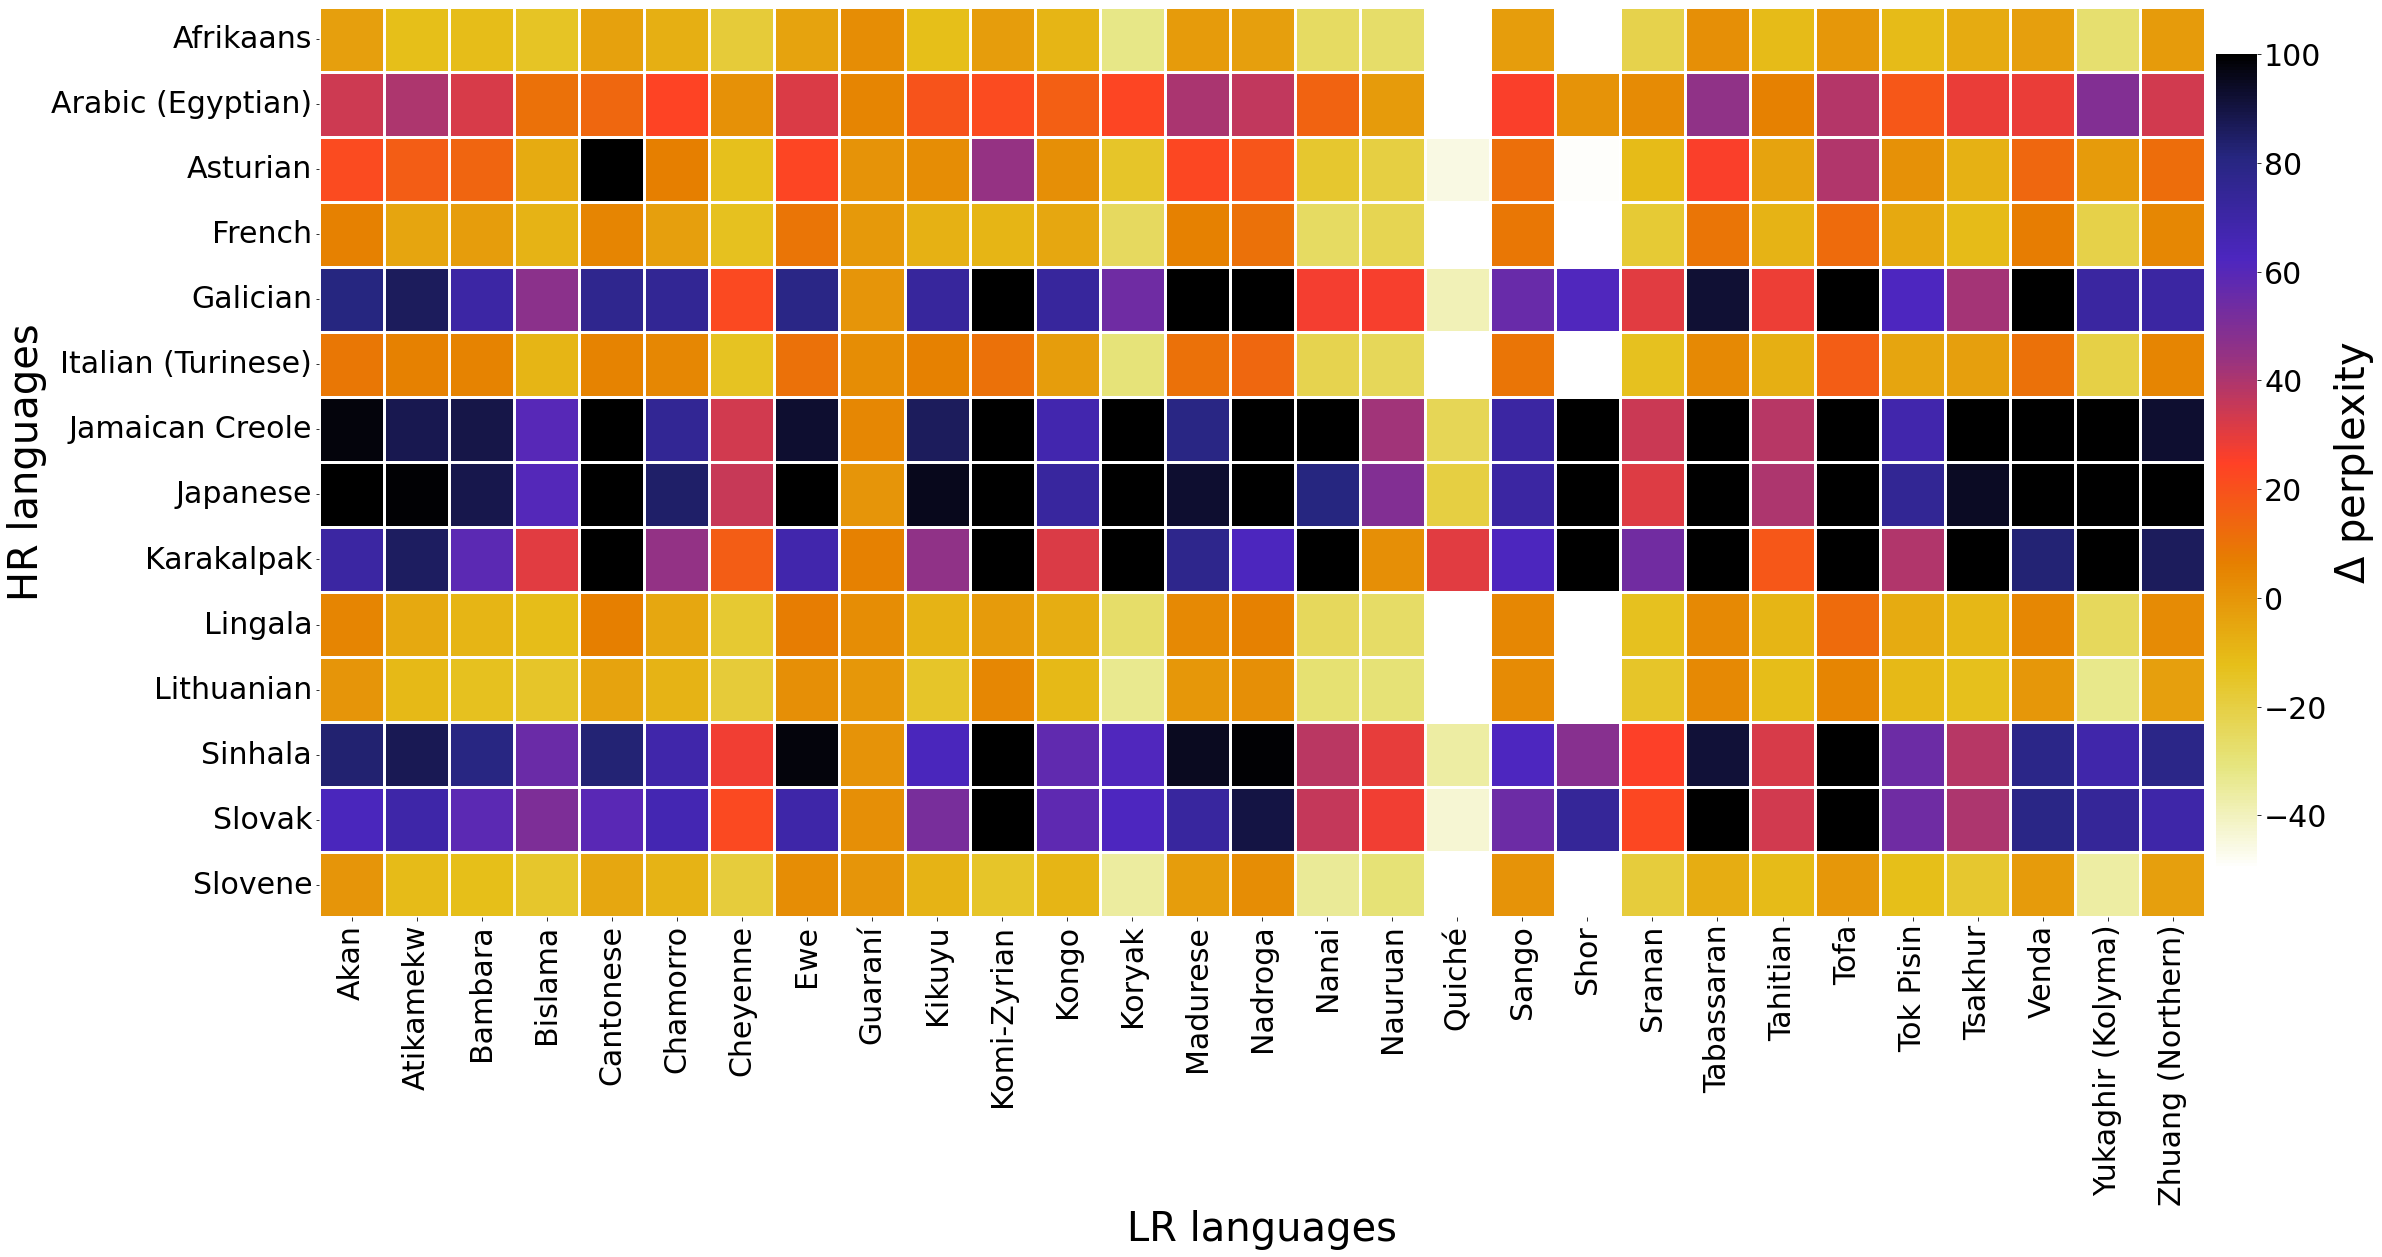

In [352]:
fig, ax = plt.subplots(1,1, figsize=(40,30))


sns.heatmap(tab_n_df, ax=ax, square=True, cbar=True, cmap="CMRmap_r", vmax=100, vmin=-50, linewidths=1.01, 
            cbar_kws={'shrink': 0.5, 'label': '$\Delta$ perplexity', "pad": 0.005})
ax.set_ylabel('HR languages', fontsize=40)
ax.set_xlabel('LR languages', fontsize=40)
ax.tick_params(axis='both', labelsize=30)
cbar = ax.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=30)
cbar.ax.tick_params(labelsize=30, axis="y", rotation=0)
ax.figure.axes[-1].yaxis.label.set_size(40)

fig.savefig("heatmap_best.pdf", bbox_inches="tight", dpi=500)

In [387]:
a = [1] * 60
n = 6
out = [a[i: i+6] for i in range(0, len(a), 6)]

In [388]:
out

[[1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1]]